In [1]:
import os
from collections import Counter
import plotly.express as px

import numpy as np
import pandas as pd
import scipy
import json

ModuleNotFoundError: No module named 'plotly'

In [6]:
data_path = os.path.join("..", "DataExtractor", "training_data.txt")
with open(data_path) as f:
    data = f.read()

In [21]:
commands_counter = Counter()
for line in data.split("\n"):
    command = line.split(" ")[0]
    if len(command) > 0:
        commands_counter[command] += 1
    
print(f"JSON: {json.dumps(commands_counter)}")

# Make human readable
human_readable = {
    'c': 'Player',
    'Ry': 'Remy',
    'Lo': 'Lorem',
    'Br': 'Bryce',
    'Wr': 'Unknown name',
    'Ka': 'Katsuharu',
    'Rz': 'Reza',
    'Kv': 'Kevin',
    'Zh': 'Zhong',
    'm': 'Narrator',
    'An': 'Anna',
    'Ad': 'Adine',
    'Sb': 'Sebastian'
}
for key in list(commands_counter.keys()):
    commands_counter[human_readable[key]] = commands_counter.pop(key)
print(f"Human redable: {commands_counter}")

JSON: {"c": 3785, "Ry": 882, "m": 1015, "Lo": 743, "Br": 1208, "Wr": 23, "An": 865, "Ad": 1024, "Sb": 593, "Ka": 98, "Rz": 261, "Zh": 209, "Kv": 149}
Human redable: Counter({'Player': 3785, 'Bryce': 1208, 'Adine': 1024, 'Narrator': 1015, 'Remy': 882, 'Anna': 865, 'Lorem': 743, 'Sebastian': 593, 'Reza': 261, 'Zhong': 209, 'Kevin': 149, 'Katsuharu': 98, 'Unknown name': 23})


In [22]:
df = pd.DataFrame.from_dict(commands_counter, orient='index').reset_index()
df

,index,0
0,Player,3785
1,Remy,882
2,Narrator,1015
3,Lorem,743
4,Bryce,1208
5,Unknown name,23
6,Anna,865
7,Adine,1024
8,Sebastian,593
9,Katsuharu,98


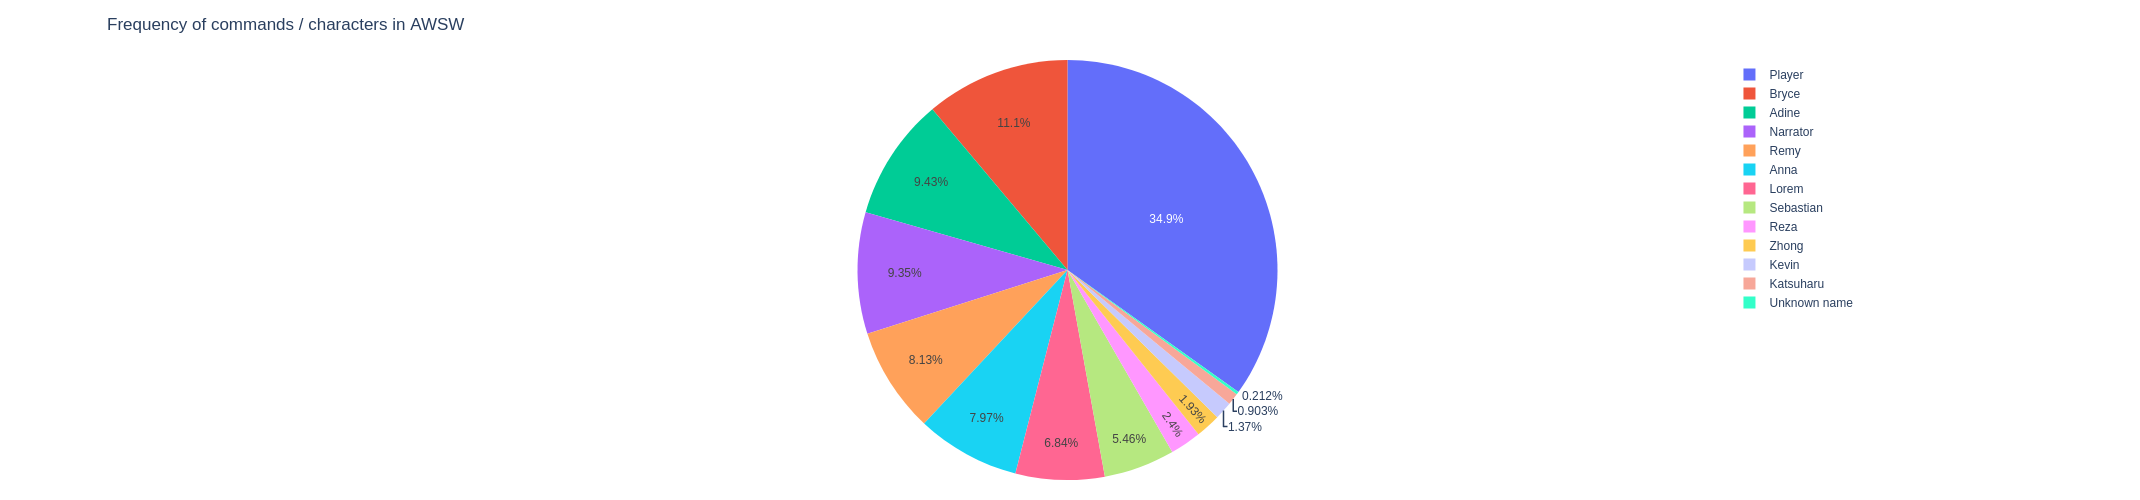

In [23]:
fig = px.pie(df, values=0, names='index', title='Frequency of commands / characters in AWSW')
fig.update_layout(
    margin=dict(l=20, r=20, t=60, b=20),
    paper_bgcolor="White",
    height=500
)

fig.show()